# Immune metacells (generated in the HDG space computed per patient with the dispersion method) integrated with ScGen and processed in the same HDG space used to generate metacells

In [1]:
## import libraries
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
sc.settings.set_figure_params(dpi_save=300, frameon=False, format='png')
sc.settings.figdir = "/home/marta.sallese/ov_cancer_atlas/atlas_project/plots_def/integration/metacells/"

In [3]:
import configparser

# Read configuration file
config = configparser.ConfigParser()
config.read("../../utils/config.ini")

rawPath = config.get("DEFAULT", "rawPath")

adata = sc.read(rawPath + 'integration/metacells/seacells_immune_hdg_patients_batch_corr_scgen_celltypes.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 15397 × 17054
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'SEACell', '# Single Cells', 'tissue-treatment', 'Plasma_cells', 'T_cells', 'Mast_cells', 'B_cells', 'Myeloid_cells', 'Dendritic_cells', 'cell_types', '_scvi_batch', '_scvi_labels'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'corrected_latent', 'latent'

In [5]:
adata.obs

tissue developmental_stage  \
SEACell_patient_tissue                                                 
SEACell-13_Geistlinger_59_Metastasis  Metastasis      Advanced stage   
SEACell-11_Geistlinger_59_Metastasis  Metastasis      Advanced stage   
SEACell-28_Geistlinger_59_Metastasis  Metastasis      Advanced stage   
SEACell-40_Geistlinger_59_Metastasis  Metastasis      Advanced stage   
SEACell-43_Geistlinger_59_Metastasis  Metastasis      Advanced stage   
...                                          ...                 ...   
SEACell-80_Vasquez_118_Metastasis     Metastasis      Advanced stage   
SEACell-148_Vasquez_118_Metastasis    Metastasis      Advanced stage   
SEACell-75_Vasquez_118_Metastasis     Metastasis      Advanced stage   
SEACell-107_Vasquez_118_Metastasis    Metastasis      Advanced stage   
SEACell-158_Vasquez_118_Metastasis    Metastasis      Advanced stage   

                                     treatment  recurrence tumor_stage  \
SEACell_patient_tissue                                                   
SEACell-13_Geistlinger_59_Metastasis       CHT  Recurrence          IV   
SEACell-11_Geistlinger_59_Metastasis       CHT  Recurrence          IV   
SEACell-28_Geistlinger_59_Metastasis       CHT  Recurrence          IV   
SEACell-40_Geistlinger_59_Metastasis       CHT  Recurrence          IV   
SEACell-43_Geistlinger_59_Metastasis       CHT  Recurrence          IV   
...                                        ...         ...         ...   
SEACell-80_Vasquez_118_Metastasis        Naive     Unknown         IVB   
SEACell-148_Vasquez_118_Metastasis       Naive     Unknown         IVB   
SEACell-75_Vasquez_118_Metastasis        Naive     Unknown         IVB   
SEACell-107_Vasquez_118_Metastasis       Naive     Unknown         IVB   
SEACell-158_Vasquez_118_Metastasis       Naive     Unknown         IVB   

                                            paper_ID anatomical_location  \
SEACell_patient_tissue                                                     
SEACell-13_Geistlinger_59_Metastasis  Geistlinger_59             Omentum   
SEACell-11_Geistlinger_59_Metastasis  Geistlinger_59             Omentum   
SEACell-28_Geistlinger_59_Metastasis  Geistlinger_59             Omentum   
SEACell-40_Geistlinger_59_Metastasis  Geistlinger_59             Omentum   
SEACell-43_Geistlinger_59_Metastasis  Geistlinger_59             Omentum   
...                                              ...                 ...   
SEACell-80_Vasquez_118_Metastasis        Vasquez_118          Peritoneum   
SEACell-148_Vasquez_118_Metastasis       Vasquez_118          Peritoneum   
SEACell-75_Vasquez_118_Metastasis        Vasquez_118          Peritoneum   
SEACell-107_Vasquez_118_Metastasis       Vasquez_118          Peritoneum   
SEACell-158_Vasquez_118_Metastasis       Vasquez_118          Peritoneum   

                                          dataset      SEACell  \
SEACell_patient_tissue                                           
SEACell-13_Geistlinger_59_Metastasis  Geistlinger   SEACell-13   
SEACell-11_Geistlinger_59_Metastasis  Geistlinger   SEACell-11   
SEACell-28_Geistlinger_59_Metastasis  Geistlinger   SEACell-28   
SEACell-40_Geistlinger_59_Metastasis  Geistlinger   SEACell-40   
SEACell-43_Geistlinger_59_Metastasis  Geistlinger   SEACell-43   
...                                           ...          ...   
SEACell-80_Vasquez_118_Metastasis         Vasquez   SEACell-80   
SEACell-148_Vasquez_118_Metastasis        Vasquez  SEACell-148   
SEACell-75_Vasquez_118_Metastasis         Vasquez   SEACell-75   
SEACell-107_Vasquez_118_Metastasis        Vasquez  SEACell-107   
SEACell-158_Vasquez_118_Metastasis        Vasquez  SEACell-158   

                                      # Single Cells  tissue-treatment  \
SEACell_patient_tissue                                                   
SEACell-13_Geistlinger_59_Metastasis              41    Metastasis_CHT   
SEACell-11_Geistlinger_59_Metastasis              69    Metastasis_CHT  

In [6]:
adata.obs = adata.obs.drop(columns=['_scvi_batch', '_scvi_labels'])

In [7]:
hvg = pd.read_csv('/home/marta.sallese/ov_cancer_atlas/Atlas_scripts/HDG_new/Tables/atlas_hdg_common_dispersion_patients_immune.csv',  index_col=0)

In [8]:
hvg[hvg.highly_variable]

highly_variable
FAM87B              True
FAM41C              True
SAMD11              True
HES4                True
ISG15               True
...                  ...
MT-CO3              True
MT-ND3              True
MT-ND4L             True
MT-ND4              True
MT-CYB              True

[5088 rows x 1 columns]

In [9]:
hvg.highly_variable.sum()

5088

In [10]:
adata.var

Empty DataFrame
Columns: []
Index: [FAM87B, LINC00115, FAM41C, SAMD11, NOC2L, KLHL17, PLEKHN1, HES4, ISG15, AGRN, RNF223, C1orf159, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, UBE2J2, SCNN1D, ACAP3, PUSL1, TAS1R3, DVL1, MXRA8, AURKAIP1, CCNL2, MRPL20, ANKRD65, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, MIB2, MMP23B, CDK11B, SLC35E2B, CDK11A, NADK, GNB1, CALML6, TMEM52, GABRD, PRKCZ, SKI, MORN1, RER1, PEX10, PLCH2, PANK4, HES5, TNFRSF14, MMEL1, TTC34, PRDM16, ARHGEF16, MEGF6, TPRG1L, WRAP73, TP73, CCDC27, SMIM1, LRRC47, CEP104, DFFB, C1orf174, LINC01134, AJAP1, NPHP4, KCNAB2, CHD5, RPL22, RNF207, ICMT, LINC00337, GPR153, ACOT7, HES2, ESPN, TNFRSF25, PLEKHG5, NOL9, TAS1R1, ZBTB48, KLHL21, PHF13, THAP3, DNAJC11, CAMTA1, VAMP3, PER3, UTS2, TNFRSF9, PARK7, ERRFI1, SLC45A1, RERE, ENO1, CA6, ...]

[17054 rows x 0 columns]

In [11]:
adata.var['highly_variable']=hvg.highly_variable

In [12]:
adata.var

highly_variable
FAM87B               True
LINC00115           False
FAM41C               True
SAMD11               True
NOC2L               False
...                   ...
MT-ND4L              True
MT-ND4               True
MT-ND5              False
MT-ND6              False
MT-CYB               True

[17054 rows x 1 columns]

In [13]:
adata.var.highly_variable = adata.var.highly_variable.fillna(False)

In [14]:
# you can skip this passage if you specify use_highly_variable = True when computing embeddings
# adata.raw = adata
# adata = adata[:, adata.var.highly_variable]

In [15]:
adata.var_names

Index(['FAM87B', 'LINC00115', 'FAM41C', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1',
       'HES4', 'ISG15', 'AGRN',
       ...
       'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', length=17054)

In [16]:
cell_cycle_genes = [x.strip() for x in open('/home/marta.sallese/ov_cancer_atlas/regev_lab_cell_cycle_genes.txt')]

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [17]:
adata.obs

tissue developmental_stage  \
SEACell_patient_tissue                                                 
SEACell-13_Geistlinger_59_Metastasis  Metastasis      Advanced stage   
SEACell-11_Geistlinger_59_Metastasis  Metastasis      Advanced stage   
SEACell-28_Geistlinger_59_Metastasis  Metastasis      Advanced stage   
SEACell-40_Geistlinger_59_Metastasis  Metastasis      Advanced stage   
SEACell-43_Geistlinger_59_Metastasis  Metastasis      Advanced stage   
...                                          ...                 ...   
SEACell-80_Vasquez_118_Metastasis     Metastasis      Advanced stage   
SEACell-148_Vasquez_118_Metastasis    Metastasis      Advanced stage   
SEACell-75_Vasquez_118_Metastasis     Metastasis      Advanced stage   
SEACell-107_Vasquez_118_Metastasis    Metastasis      Advanced stage   
SEACell-158_Vasquez_118_Metastasis    Metastasis      Advanced stage   

                                     treatment  recurrence tumor_stage  \
SEACell_patient_tissue                                                   
SEACell-13_Geistlinger_59_Metastasis       CHT  Recurrence          IV   
SEACell-11_Geistlinger_59_Metastasis       CHT  Recurrence          IV   
SEACell-28_Geistlinger_59_Metastasis       CHT  Recurrence          IV   
SEACell-40_Geistlinger_59_Metastasis       CHT  Recurrence          IV   
SEACell-43_Geistlinger_59_Metastasis       CHT  Recurrence          IV   
...                                        ...         ...         ...   
SEACell-80_Vasquez_118_Metastasis        Naive     Unknown         IVB   
SEACell-148_Vasquez_118_Metastasis       Naive     Unknown         IVB   
SEACell-75_Vasquez_118_Metastasis        Naive     Unknown         IVB   
SEACell-107_Vasquez_118_Metastasis       Naive     Unknown         IVB   
SEACell-158_Vasquez_118_Metastasis       Naive     Unknown         IVB   

                                            paper_ID anatomical_location  \
SEACell_patient_tissue                                                     
SEACell-13_Geistlinger_59_Metastasis  Geistlinger_59             Omentum   
SEACell-11_Geistlinger_59_Metastasis  Geistlinger_59             Omentum   
SEACell-28_Geistlinger_59_Metastasis  Geistlinger_59             Omentum   
SEACell-40_Geistlinger_59_Metastasis  Geistlinger_59             Omentum   
SEACell-43_Geistlinger_59_Metastasis  Geistlinger_59             Omentum   
...                                              ...                 ...   
SEACell-80_Vasquez_118_Metastasis        Vasquez_118          Peritoneum   
SEACell-148_Vasquez_118_Metastasis       Vasquez_118          Peritoneum   
SEACell-75_Vasquez_118_Metastasis        Vasquez_118          Peritoneum   
SEACell-107_Vasquez_118_Metastasis       Vasquez_118          Peritoneum   
SEACell-158_Vasquez_118_Metastasis       Vasquez_118          Peritoneum   

                                          dataset      SEACell  \
SEACell_patient_tissue                                           
SEACell-13_Geistlinger_59_Metastasis  Geistlinger   SEACell-13   
SEACell-11_Geistlinger_59_Metastasis  Geistlinger   SEACell-11   
SEACell-28_Geistlinger_59_Metastasis  Geistlinger   SEACell-28   
SEACell-40_Geistlinger_59_Metastasis  Geistlinger   SEACell-40   
SEACell-43_Geistlinger_59_Metastasis  Geistlinger   SEACell-43   
...                                           ...          ...   
SEACell-80_Vasquez_118_Metastasis         Vasquez   SEACell-80   
SEACell-148_Vasquez_118_Metastasis        Vasquez  SEACell-148   
SEACell-75_Vasquez_118_Metastasis         Vasquez   SEACell-75   
SEACell-107_Vasquez_118_Metastasis        Vasquez  SEACell-107   
SEACell-158_Vasquez_118_Metastasis        Vasquez  SEACell-158   

                                      # Single Cells  ... Plasma_cells  \
SEACell_patient_tissue                                ...                
SEACell-13_Geistlinger_59_Metastasis              41  ...   -78.401033   
SEACell-11_Geistlinger_59_Metastasis              69  ...  -107.718991  

In [18]:
sc.tl.pca(adata, use_highly_variable=True)

In [19]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)
sc.tl.umap(adata)

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


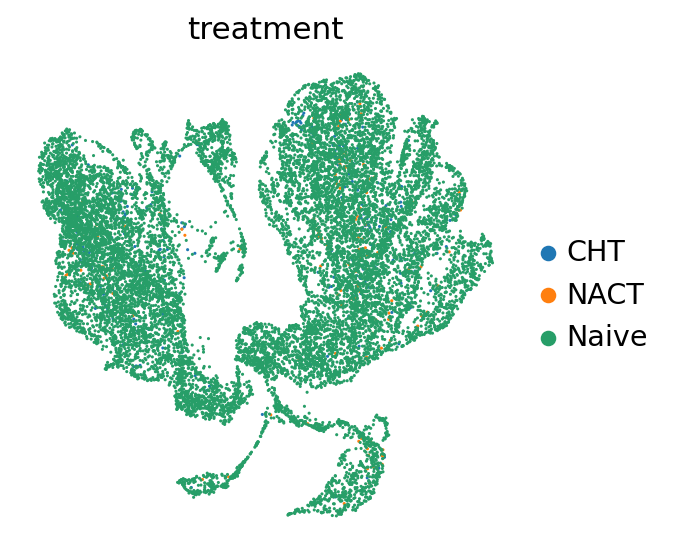

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


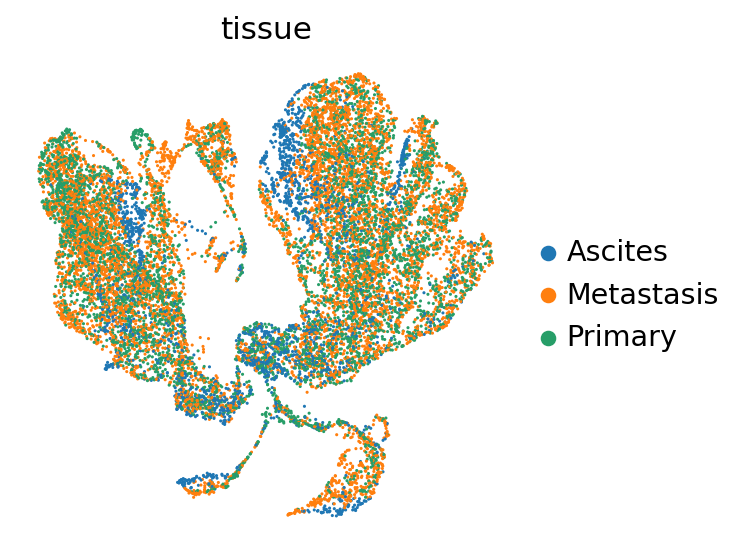

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


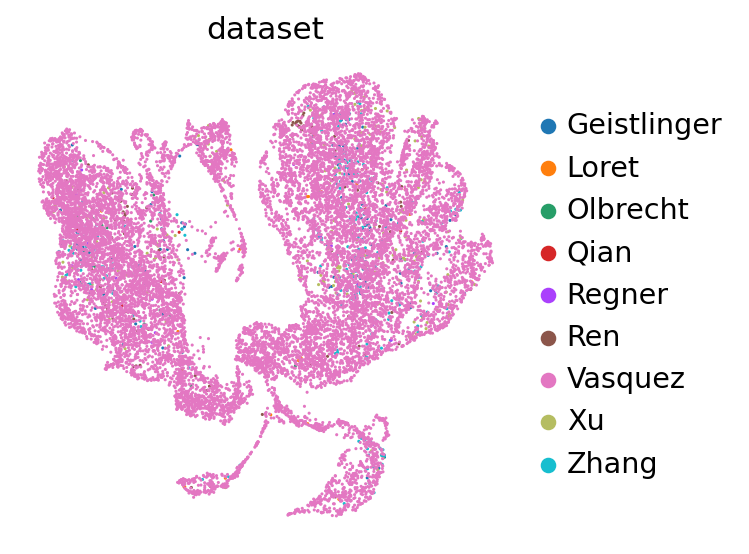

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


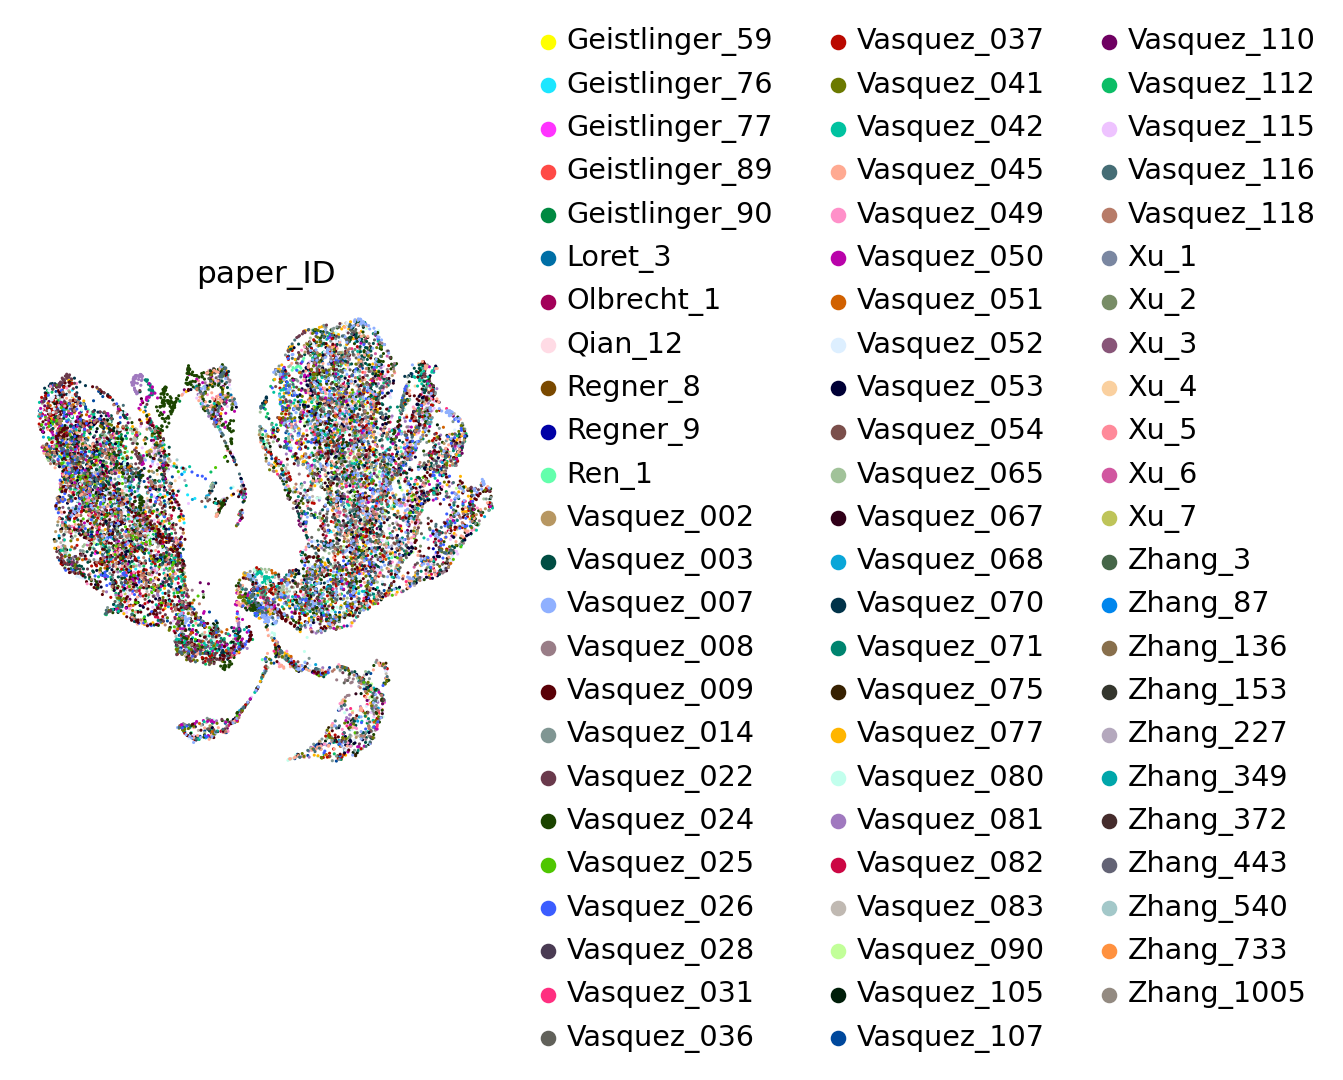

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


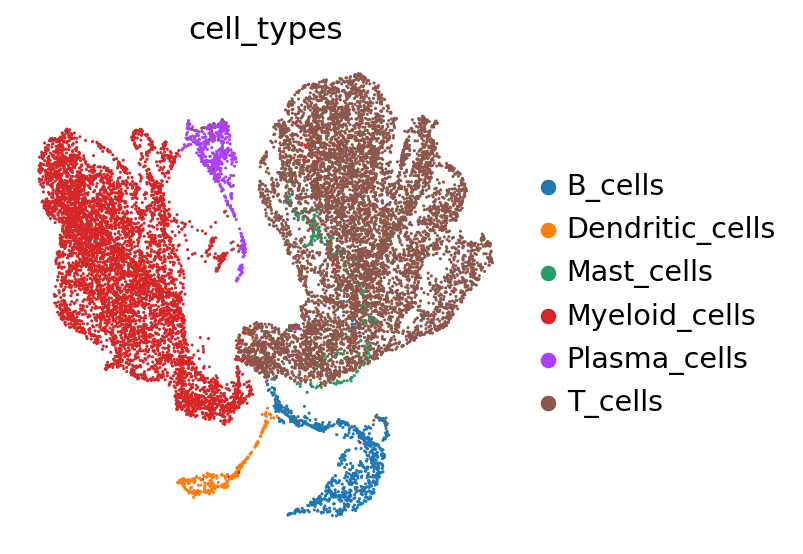

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


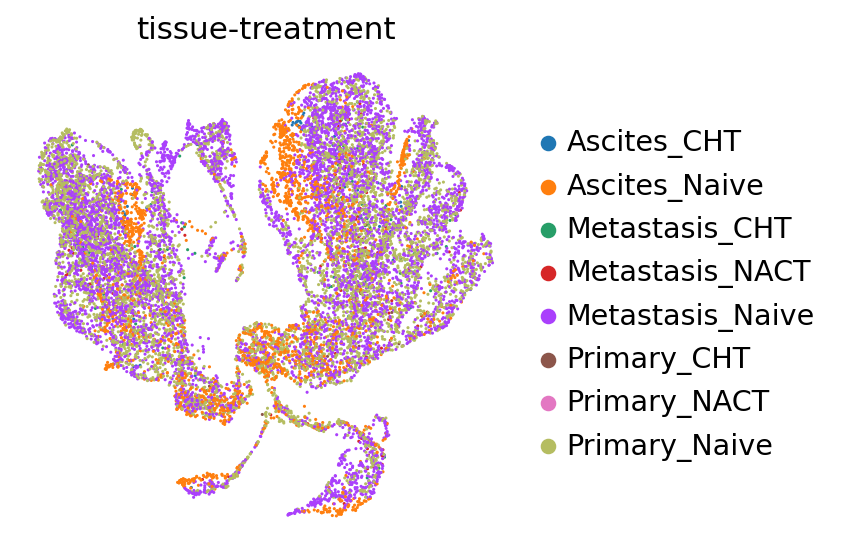

In [20]:
sc.pl.umap(adata, color=["treatment"], frameon=False, save='/home/marta.sallese/ov_cancer_atlas/atlas_project/plots_def/integration/metacells/immune_seacells_HDG_treatm.png')
sc.pl.umap(adata, color=["tissue"], frameon=False, save='/home/marta.sallese/ov_cancer_atlas/atlas_project/plots_def/integration/metacells/immune_seacells_HDG_tissue.png')
sc.pl.umap(adata, color=["dataset"], frameon=False, save='/home/marta.sallese/ov_cancer_atlas/atlas_project/plots_def/integration/metacells/immune_seacells_HDG_dataset.png')
sc.pl.umap(adata, color=["paper_ID"], frameon=False, save='/home/marta.sallese/ov_cancer_atlas/atlas_project/plots_def/integration/metacells/immune_seacells_HDG_patients.png')
sc.pl.umap(adata, color=["cell_types"], frameon=False, save='/home/marta.sallese/ov_cancer_atlas/atlas_project/plots_def/integration/metacells/immune_seacells_HDG_celltypes.png')
sc.pl.umap(adata, color=["phase"], frameon=False, save='/home/marta.sallese/ov_cancer_atlas/atlas_project/plots_def/integration/metacells/immune_seacells_HDG_cellcycle.png')
sc.pl.umap(adata, color=["tissue-treatment"], frameon=False, save='/home/marta.sallese/ov_cancer_atlas/atlas_project/plots_def/integration/metacells/immune_seacells_HDG_tissue-treat.png')

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


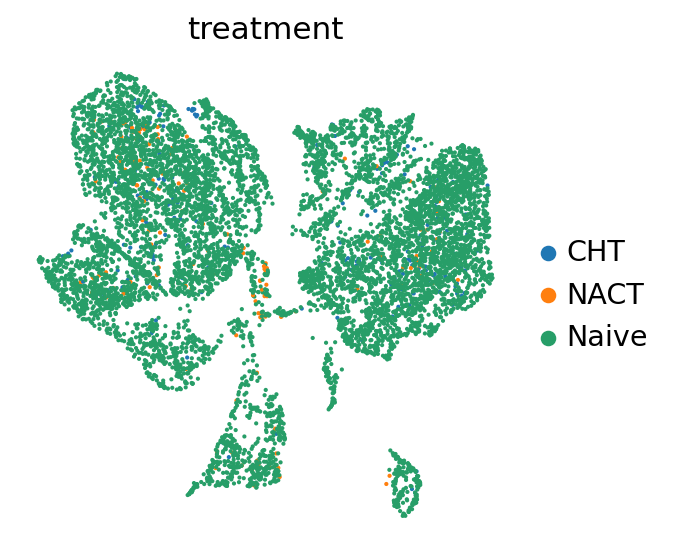

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


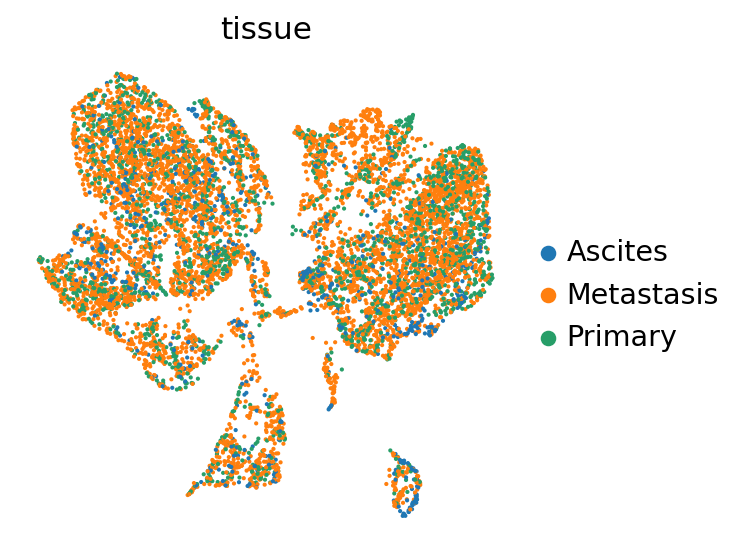

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


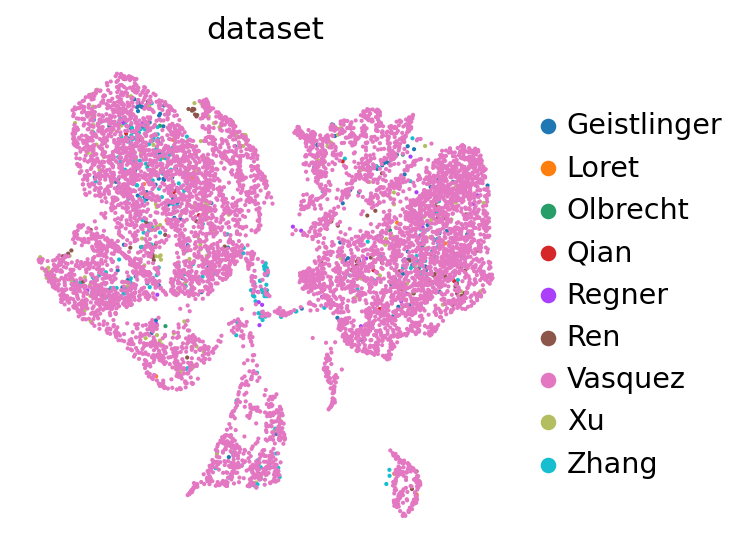

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


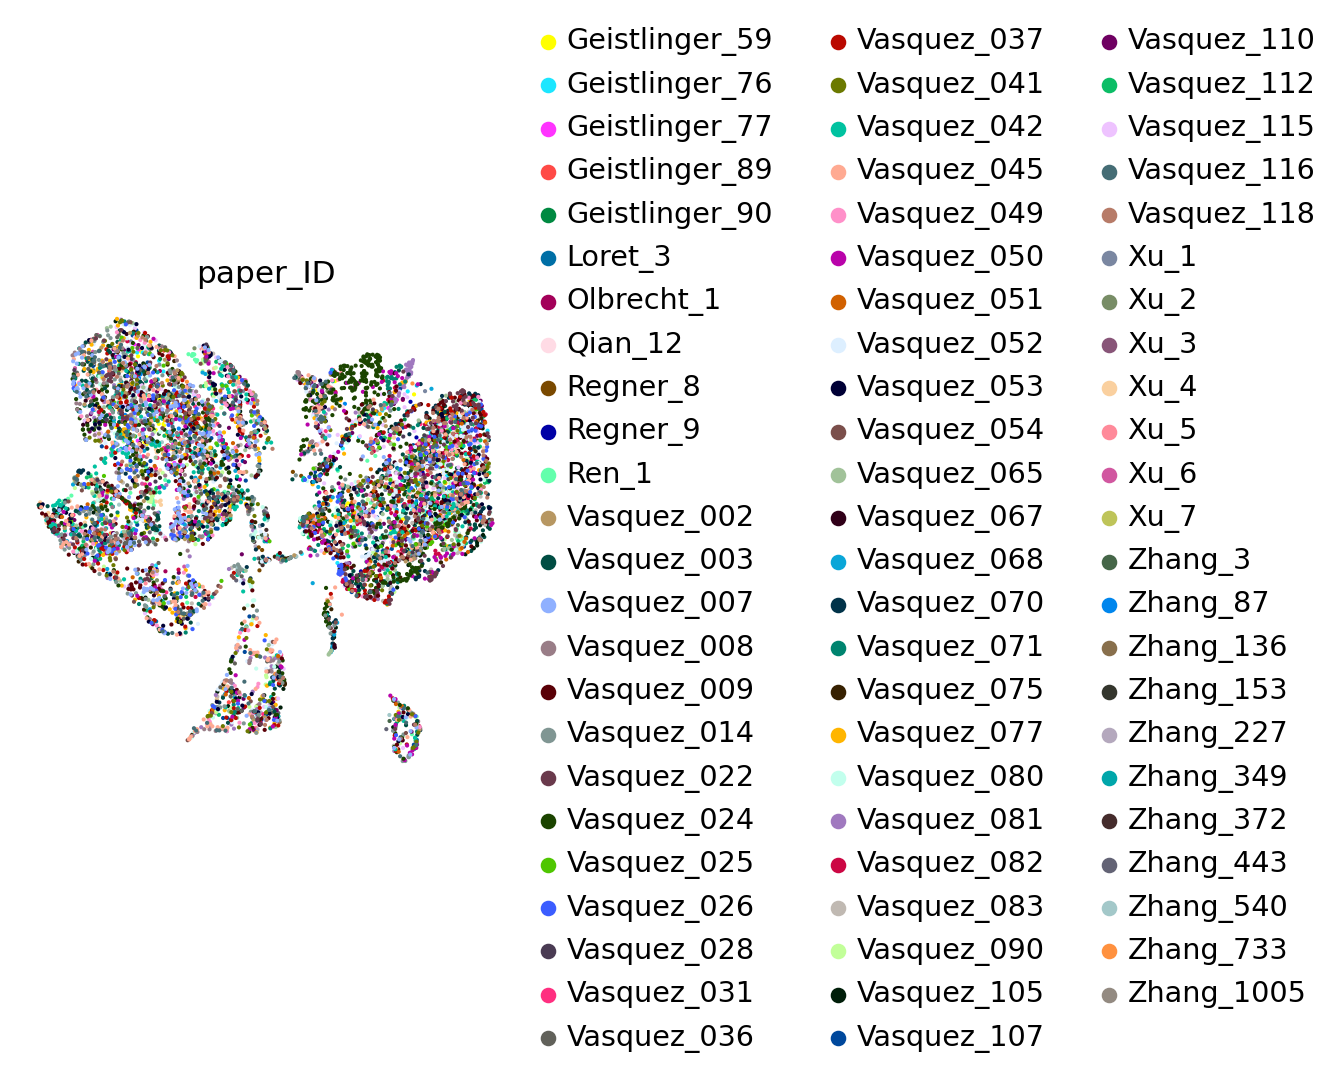

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


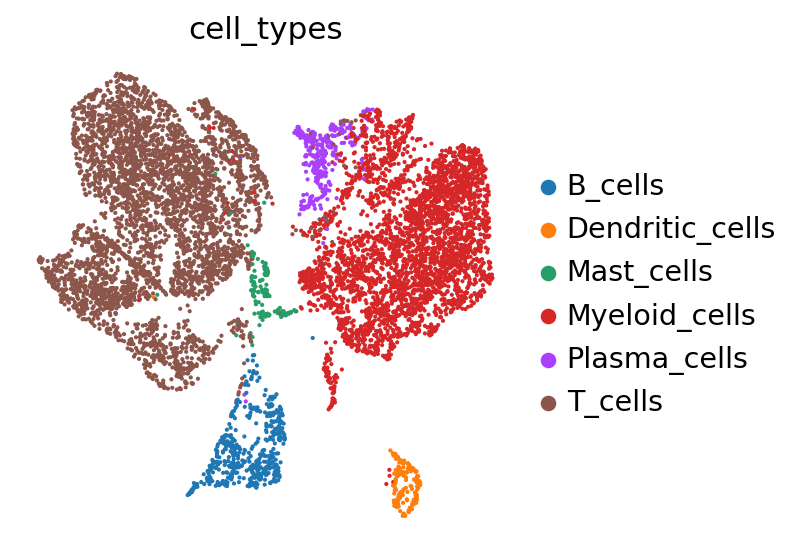

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


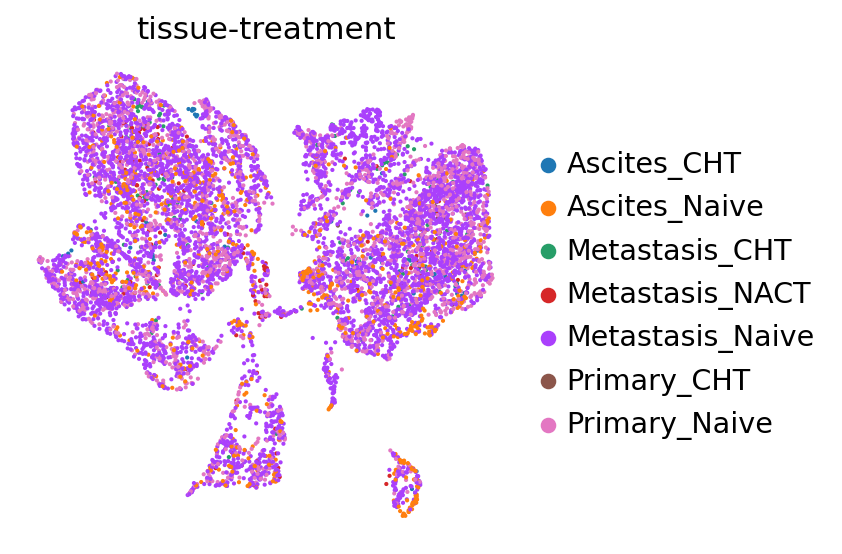

In [42]:
#before
sc.pl.umap(adata, color=["treatment"], frameon=False)#, save='seacells_HDG_treatm.png')
sc.pl.umap(adata, color=["tissue"], frameon=False)#, save='seacells_HDG_tissue.png')
sc.pl.umap(adata, color=["dataset"], frameon=False)#, save='seacells_HDG_dataset.png')
sc.pl.umap(adata, color=["paper_ID"], frameon=False)#, save='seacells_HDG_patients.png')
sc.pl.umap(adata, color=["cell_types"], frameon=False)#, save='seacells_HDG_celltypes.png')
sc.pl.umap(adata, color=["tissue-treatment"], frameon=False)#, save='seacells_HDG_tissue-treat.png')

In [21]:
adata.write('/group/testa/Project/OvarianAtlas/atlas_project/raw_data/integration/metacells/seacells_immune_hdg_patients_batch_corr_scgen_celltypes_HDG.h5ad')